<h1 align='center'>Numpy - многомерные массивы данных</h1>

[Cсылка](https://disk.yandex.ru/d/IE8K3D5e7q4fEw) на файлы лабораторной

In [2]:
# комменарий
%matplotlib inline 
#команда об интерактивном использовании matplotlib
import matplotlib.pyplot as plt #импорт функций подмодуля pyplot об интерактивном 
#использовании matplotlib

## Введение

Пакет `numpy` (модуль) используется почти во всех численных вычислениях с использованием Python. Это пакет, который обеспечивает высокопроизводительные векторные, матричные и многомерные структуры данных для Python. Он реализован на C и Fortran, поэтому, когда вычисления векторизуются (формулируются векторами и матрицами), производительность очень хорошая.
Чтобы использовать `numpy`, вам нужно импортировать модуль, используя, например,:

In [3]:
from numpy import * #при этом отсутсвует необходимость использования numpy.array
#import nympy as np - позволяет сократить имя объекта используя np.array

В пакете `numpy` терминологией, используемой для векторов, матриц и многомерных наборов данных, является *array*.


## Создание `numpy` *arrays*

Существует несколько способов инициализации новых массивов numpy, например из

* список Python или кортежи
* использование функций, предназначенных для генерации массивов numpy, таких как `arange`, `linspace` и т. д.
* чтение данных из файлов

### Создание из списка (*list*)

Например, для создания новых векторных и матричных массивов из списков Python мы можем использовать `numpy.array`.

In [3]:
# вектор: аргумент функции array список (list) Python
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [4]:
# матрица: аргумент функции array вложенный список (nestled list) Python
M = array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

 `v` и `M` -- объекты общего типа `ndarray`, который создает модуль `numpy`.

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

Разница между `v` и `M` заключается только в их форме. Мы можем получить информацию о форме массива с помощью `ndarray.shape` свойства.

In [7]:
v.shape

(4,)

In [9]:
M.shape

(2, 2)

Количество элементов в массиве доступно через свойство `ndarray.size`:

In [8]:
M.size

4

Так же можно использовать функции `numpy.shape` и `numpy.size`. Использование дублирующих методы функций характерно для Python как языка поддерживающего как объектно-ориентированную так и функциональную парадигмы программирования.

In [9]:
shape(M)


(2, 2)

In [10]:
size(M)

4

До сих пор `numpy.ndarray` ужасно похож на список Python (или вложенный список). Почему бы просто не использовать списки Python для вычислений вместо создания нового типа массива?

Есть несколько причин:

* Списки Python очень общие. Они могут содержать любой вид объекта. Они динамически типизируются. Они не поддерживают математические функции, такие как матричное и точечное умножение и т. д. Реализация таких функций для списков Python была бы не очень эффективной из-за динамической типизации.
* Массивы Numpy **статически типизированы** и **однородны**. Тип элементов определяется при создании массива.
* Массивы Numpy эффективны для работы с памятью.
* Из-за статической типизации быстро реализуются математические функции, такие как умножение и сложение массивов `numpy`, функции могут быть реализованы на компилируемом языке (используется C и Fortran).

Используя свойство `dtype` (тип данных) `ndarray`, мы можем увидеть, какой тип имеют данные массива:

In [11]:
M.dtype

dtype('int64')

Обратите внимание, что при не совпадении типов при присвоении будет выдана ошибка, что есть следствие статической типизации `ndarray`:

In [12]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

Если мы хотим, мы можем явно определить тип данных массива при его создании, используя аргумент ключевого слова `dtype`:

In [13]:
M = array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Общие типы данных, которые можно использовать с `dtype`: `int`, `float`, `complex`, `bool`, `object` и т. д.

Мы также можем явно определить битовый размер типов данных, например: `int64`, `int16`, `float128`, `complex128`.

### Задание 1
Создайте матрицу таблицы умножения с использованием списков


In [163]:
x = [i for i in range(1, 11)]
y = [i for i in range(1, 11)]

z = [[i*j for j in x] for i in y]

z

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
 [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
 [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 [6, 12, 18, 24, 30, 36, 42, 48, 54, 60],
 [7, 14, 21, 28, 35, 42, 49, 56, 63, 70],
 [8, 16, 24, 32, 40, 48, 56, 64, 72, 80],
 [9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]]

### Функции генерирующие массивы.

Для больших массивов нецелесообразно инициализировать данные вручную, используя явные списки Python. Вместо этого мы можем использовать одну из многих функций в `numpy`, которые генерируют массивы различных форм. Некоторые из наиболее распространенных являются:

#### Функция arange

In [15]:
# массив целых от 0 до 10

x = arange(10, 5, -1) # аргументы: начало, конец, шаг
x

array([10,  9,  8,  7,  6])

In [16]:
x = arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### Функции linspace и logspace

In [17]:
# использование linspace, оба конечных значения включены
linspace(5, 10, 11)

array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [18]:
logspace(0, 10, 11, base=10) # создание равномерной последовальности в логарифмической шкале

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09, 1.e+10])

#### Функция mgrid

In [19]:
x, y = mgrid[0:5, 0:5] #создает сетку равномерно расположенных значений подобно meshgrid в MATLAB

In [20]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [21]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### Создание случайных данных средствами random

In [22]:
from numpy import random

In [23]:
# случайные данные с равномерным распределением в отрезке [0,1]
random.rand(5,5)

array([[0.87950959, 0.43135185, 0.83947719, 0.30879145, 0.35390879],
       [0.84384188, 0.59869105, 0.31293744, 0.16831853, 0.99594691],
       [0.53255956, 0.35105116, 0.13165215, 0.11722938, 0.6270488 ],
       [0.1699339 , 0.77301408, 0.81393317, 0.44279883, 0.45321759],
       [0.02874517, 0.6029937 , 0.3961581 , 0.16313713, 0.37047914]])

In [24]:
# случайные данные с нормальным распределением
random.randn(5,5)

array([[ 1.34295274, -0.16800045,  0.58220715, -0.75297672,  0.8868843 ],
       [ 0.6052679 ,  1.20561353, -0.07419366, -1.14813822,  0.1367553 ],
       [ 0.10127414, -0.00450936,  0.28112534,  0.289708  , -0.79847966],
       [ 0.37492423,  1.20687608,  0.44925517,  0.00228857,  1.68782746],
       [ 0.70456323,  1.85082065, -0.66635693, -0.47899099,  0.34543165]])

#### Создание квадратных матриц функцией diag

In [25]:
# матрица с диагональю
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [26]:
# матрица со сдвинутой диагональю
diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### Матрицы или спецмассивы zeros и ones

In [27]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Задание 2
Создайте функцию, которая принимает как аргументы целое число N и первый элемент (вещественное число el1), и разность (вещественное число d) и создает матрицу по диагонали, которой распологаются первые N членов арифметической прогрессии.



In [164]:
def make_diagonal_matrix(n, el_1, d):
    diagonal_matrix = diag(arange(el_1, n, d))
    return diagonal_matrix


make_diagonal_matrix(1000, 2, 3)

array([[  2,   0,   0, ...,   0,   0,   0],
       [  0,   5,   0, ...,   0,   0,   0],
       [  0,   0,   8, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 992,   0,   0],
       [  0,   0,   0, ...,   0, 995,   0],
       [  0,   0,   0, ...,   0,   0, 998]])

## Запись и чтение в файл

### Файлы данных Comma-separated values (CSV)

Очень распространенным форматом файлов данных являются значения, разделенные запятыми (CSV), или связанные с ними форматы, такие как TSV (значения, разделенные табуляциями). Для чтения данных из таких файлов в массивы Numpy мы можем использовать функцию `numpy.genfromtxt`. Например:

In [30]:
data = genfromtxt('./data/stockholm_td_adj.dat')

In [31]:
data.shape

(77431, 7)

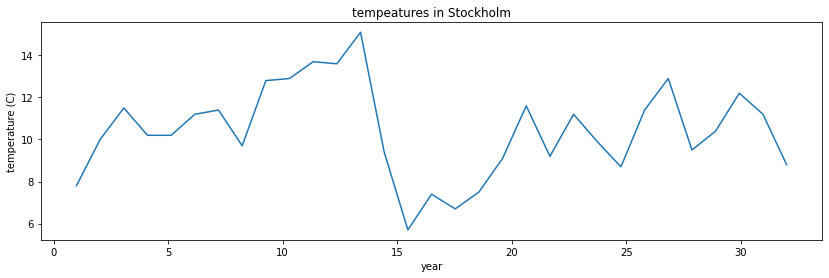

In [32]:
fig, ax = plt.subplots(figsize=(14,4))
x=linspace(1,32,31)
y=array([data[i,5] for i in range(data.shape[0]) if (data[i,0]==1950)*(data[i,1]==5)])
ax.plot(x,y)
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');


Используя `numpy.savetxt` можно записать Numpy массив в файл CSV формате:

In [33]:
M = random.rand(3,3)

M

array([[0.45910808, 0.8880554 , 0.49424628],
       [0.65653375, 0.26106555, 0.94557388],
       [0.81337154, 0.6361242 , 0.51155876]])

In [34]:
savetxt("random-matrix.csv", M)

In [35]:
savetxt("random-matrix.csv", M, fmt='%.5f') # fmt определяет формат данных
rand_data = genfromtxt('random-matrix.csv')
rand_data

array([[0.45911, 0.88806, 0.49425],
       [0.65653, 0.26107, 0.94557],
       [0.81337, 0.63612, 0.51156]])

### Формат файлов Numpy

Полезно при хранении и считывании данных массива numpy. Используйте функции `numpy.save` и `numpy.load`:

In [36]:
save("random-matrix.npy", M)

In [ ]:
file_open = load("random-matrix.npy")

file_open

### Задание 3
Из данных по температуре в Стокгольме выбрать данные относящиеся к октябрю 1970 года и записать их в бинарный и текстовый файлы oct70.bin и oct70.txt. Затем прочитайте их импортировав в тетрадь ноутбука и сравните.

In [46]:
temperature_data = loadtxt("./data/stockholm_td_adj.dat")

In [160]:
data = genfromtxt("./data/stockholm_td_adj.dat")
arr_data = array([data[i, 5] for i in range(data.shape[0]) if (data[i, 0] == 1970) * (data[i, 1] == 10)])
savetxt("oct70.bin", arr_data)
savetxt("oct70.txt", arr_data)
txt_final = loadtxt("oct70.txt")
bin_final = loadtxt('oct70.bin')

for i in range(31):
    print(f"Температура = {txt_final[i]}, {bin_final[i]}.")

Температура = 10.4, 10.4.
Температура = 9.0, 9.0.
Температура = 7.8, 7.8.
Температура = 6.6, 6.6.
Температура = 7.9, 7.9.
Температура = 10.7, 10.7.
Температура = 12.2, 12.2.
Температура = 12.2, 12.2.
Температура = 10.2, 10.2.
Температура = 10.9, 10.9.
Температура = 9.7, 9.7.
Температура = 9.0, 9.0.
Температура = 6.7, 6.7.
Температура = 4.8, 4.8.
Температура = 8.2, 8.2.
Температура = 9.9, 9.9.
Температура = 9.8, 9.8.
Температура = 8.6, 8.6.
Температура = 8.8, 8.8.
Температура = 7.3, 7.3.
Температура = 6.2, 6.2.
Температура = 3.0, 3.0.
Температура = 0.5, 0.5.
Температура = 4.5, 4.5.
Температура = 6.3, 6.3.
Температура = 3.3, 3.3.
Температура = 1.6, 1.6.
Температура = 1.7, 1.7.
Температура = 2.3, 2.3.
Температура = 1.8, 1.8.
Температура = 1.1, 1.1.


In [ ]:
#with open("./data/", mode="w+", encoding="utf8"):
savetxt("./data/1970.dat")

In [73]:
data_1970 = []

for i in range(len(temperature_data)):
    #print(temperature_data[:, 0][i])

    if i == 1970:
        print(i)
        data_1970.append(temperature_data[0, :i])

data_1970


1970


[array([ 1.8e+03,  1.0e+00,  1.0e+00, -6.1e+00, -6.1e+00, -6.1e+00,
         1.0e+00])]

## Дополнительные свойства `numpy` *arrays*

In [48]:
M.itemsize # размер элемента в байтах

8

In [49]:
M.nbytes # кол-во байт

72

In [50]:
M.ndim # размерность

2

## Преобразование массивов

### Использование индексов

Доступ к элементам через индекс:

In [53]:
# v -- вектор, размерность 1, испльзуем 1 индекс
v[0]

1

In [54]:
# M -- матрица, 2-х мерный объект, используем 2 индекса 
M[1,1]

0.7274670972294646

Если мы опустим один из индексов, то получим объект пониженной размерности. В случае двумерной матрицы, получим вектор. 

In [ ]:
M

In [ ]:
M[1]

Такой же эффект получится при использовании `:` на месте индекса:

In [ ]:
M[1,:] # строка (row) 1

In [ ]:
M[:,1] # столбец (column) 1

Мы можем присваивать новые значения элементам массива с помощью индексации:

In [ ]:
M[0,0] = 1

In [ ]:
M

In [ ]:
# также работает для строк и столбцов
M[1,:] = 0
M[:,2] = -1

In [ ]:
M

### Срезы (*slice*) по индексам

Срезы по индексам техническое название `M[нижний индекс:верхний индекс:шаг]` предназначенные для извлечения части массива:

In [ ]:
A = array([1,2,3,4,5])
A

In [ ]:
A[1:3]

Срезы массива являются *изменяемыми (mutable)*: если им присвоено новое значение, то исходный массив, из которого был извлечен срез, изменяется:

In [ ]:
A[1:3] = [-2,-3]

A

Можно не указывать любой из трех параметров среза`M[нижний индекс:верхний индекс:шаг]`:

In [ ]:
A[::] # нижний, верхний индексы и шаг (=1) принимают значения по умолчанию

In [ ]:
A[::2] # шаг равен 2, нижний и верхний индексы принимают значения начала и конца массива

In [ ]:
A[:3] # первые три элемента

In [ ]:
A[3:] # элементы с индекса 3

Отрицательные индексы отсчитываются с конца массива (положительные - с начала):

In [102]:
A = array([1,2,3,4,5])

In [58]:
A[-1] # последний элемент массива

array([40, 41, 42, 43, 44])

In [101]:
A[-3:] # последние 3 элемента

array([[20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Индексный срез работает точно так же для многомерных массивов:

In [154]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [99]:
# часть массива
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [98]:
# пошаговое извлечение
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Задание 4
Используя срезы извлеките нечетные элементы матрицы А.



In [165]:
A[:, 1::2]


array([[ 1,  3],
       [11, 13],
       [21, 23],
       [31, 33],
       [41, 43]])

### Необычное индексирование

О необычном индексировании говорят, когда массив или список используется в качестве индекса: 

In [96]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [84]:
col_indices = [1, 2, -1] # вспомним, что -1 это последний элемент
A[:,col_indices]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

Можно также использовать индексные маски: Если индексная маска представляет собой массив Numpy типа данных `bool`, то элемент выбирается (True) или нет (False) в зависимости от значения индексной маски в позиции каждого элемента:

In [89]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [90]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [91]:
# тот же результат
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Эта функция очень полезна для условного выбора элементов из массива, используя, например, операторы сравнения:

In [95]:
x = arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [93]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [ ]:
x[mask]

### Задание 5
Используйте массив из задания 1 (таблицу умножения) извлеките из него при помощи маски все числа кратные 3.


In [166]:
M = array([[j*i for j in range(1,11)] for i in range(2, 11)])

print(M)

mask = mod(M, 3) == 0

print(mask)

M[mask]

[[  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[[False False  True False False  True False False  True False]
 [ True  True  True  True  True  True  True  True  True  True]
 [False False  True False False  True False False  True False]
 [False False  True False False  True False False  True False]
 [ True  True  True  True  True  True  True  True  True  True]
 [False False  True False False  True False False  True False]
 [False False  True False False  True False False  True False]
 [ True  True  True  True  True  True  True  True  True  True]
 [False False  True False False  True False False  True False]]


array([ 6, 12, 18,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 12, 24, 36, 15,
       30, 45,  6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 21, 42, 63, 24, 48,
       72,  9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 30, 60, 90])

In [94]:
num

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Функции для извлечения данных из массивов и создания массивов

### Функция where

Индексную маску можно превратить в список индексов, используя `where`:

In [ ]:
indices = where(mask)

indices

In [ ]:
x[indices] # действие этого списка эквивалентно маске, т.е. x[mask]

### Функция diag

При помощи функции diag можно извлекать диагональные элементы с главной и смещенных диагоналей:

In [ ]:
diag(A)

In [ ]:
diag(A, -1)

### Функция take

Функция `take` подобна описанной выше необычной индексации:

In [ ]:
v2 = arange(-3,3)
v2

In [ ]:
row_indices = [1, 3, 5]
v2[row_indices] # необычная индексация

In [ ]:
v2.take(row_indices)

Но функция `take` так же работает на списках и других объектах:

In [ ]:
take([-3, -2, -1,  0,  1,  2], row_indices)

### Функция choose

Создает массив собирая элементы из нескольких массивов:

In [ ]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

choose(which, choices)

### Задание 7
Разбить массив таблицы умножения из задания 1 на два массива содержащие четные и нечетные значения, а затем собрать его в исходное состояние используя choose()

## Линейная алгебра

Векторизация кода-это ключ к написанию эффективных численных вычислений с помощью Python / Numpy. Это означает, что максимально возможная часть программы должна быть сформулирована в терминах матричных и векторных операций, таких как матричного умножения.

### Операции между числами и векторами

Мы можем использовать обычные арифметические операторы для умножения, сложения, вычитания и деления массивов со скалярами или обычными числами.

In [ ]:
v1 = arange(0, 5)

In [ ]:
v1 * 2

In [ ]:
v1 + 2

In [ ]:
A * 2, A + 2

### Поэлементные операции между массивами

Когда мы складываем, вычитаем, умножаем и делим массивы друг с другом, поведение по умолчанию-это операции **по элементам**, т.е. между элементами с совпадающими индексами:

In [ ]:
A * A # поэлементное умножение

In [ ]:
v1 * v1

Если мы умножим массивы с совместимыми размерами, то получим элементарное умножение каждой строки:

In [ ]:
A.shape, v1.shape

In [ ]:
A * v1

### Алгебра матриц

А как насчет умножения матриц? Есть два пути. Мы можем либо использовать функцию `dot`, которая применяет умножение матрица-матрица, матрица-вектор или скалярное векторное к своим двум аргументам:

In [ ]:
dot(A, A)

In [ ]:
dot(A, v1)

In [ ]:
dot(v1, v1)

В качестве альтернативы мы можем привести объекты типа массива к типу `matrix`. Это изменяет поведение стандартных арифметических операторов `+, -, *` для использования алгебры матриц.

In [ ]:
M = matrix(A)
v = matrix(v1).T # транспонирует массив в вектор столбец

In [ ]:
v

In [ ]:
M * M

In [ ]:
M * v

In [ ]:
# скалярное произведение
v.T * v

In [ ]:
# с объектами типа matrix работают все операции
v + M*v

Если использовать операции `+, -, *` с несовместимыми объектами будет выброс исключения или ошибки

In [ ]:
v = matrix([1,2,3,4,5]).T

In [ ]:
shape(M), shape(v)

In [ ]:
M * v

Посмотрите также другие подобные функции: `inner`, `outer`, `cross`, `kron`, `tensordot`. Попробуйте набрать `help(kron)`.

### Преобразования массив/матрица

Выше мы уже использовали `.T` для транспонирования матричного объекта `v`. Мы также могли бы использовать функцию `transpose` для выполнения того же самого.

Другими математическими функциями, преобразующими матричные объекты, являются:

In [4]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [5]:
conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово сопряжение: `transpose + conjugate`

In [6]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

Можно извлекать действительную и мнимую часть комплексного объекта, используя `real` и `imag`:

In [7]:
real(C) # то же, что и: C.real

matrix([[0., 0.],
        [0., 0.]])

In [8]:
imag(C) # то же, что и: C.imag

matrix([[1., 2.],
        [3., 4.]])

Или комплексный аргумент(угол) и модуль

In [9]:
angle(C+1) # для пользователей MATLAB, angle используется вместо arg

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [10]:
abs(C)

matrix([[1., 2.],
        [3., 4.]])

### Задание 8
Даны вектора v1(0,1,2,3,4) v2(5,6,7,8,9) найти угол между ними, учитывая что косинус угла между векторами можно найти как отношения их скалярного произведения к их длинам.

In [171]:
v1 = arange(0, 4, 1)
v2 = arange(5, 9, 1)
#v3 = array([v1, v2], dtype="int64")

v3 = dot(v1, v2)  # Скалярное произведение в каких единицах

v4 = sqrt(v3)  # угол между векторами

v3

44

### Вычисления над матрицами

#### Функция Inv - инверсия

In [ ]:
linalg.inv(C) # эквивалентно C.I 

In [ ]:
C.I * C

#### Функция det - детерминант

In [ ]:
linalg.det(C)

In [ ]:
linalg.det(C.I)

### Задача 9
Создайте две матрицы размером (5,5). Одна матрица содержит 5 в шахматном порядке как в задаче домашнего задания, другая имеет треугольную форму содержающую 5 на основной диагонали и в позициях выше ее, а ниже все 0. Посчитайте их детерминант и найдите обратные матрицы. Если для матрицы не у дается найти обратную, видимо этому мешает нулевое значение детерминанта.

### Обработка данных

Часто бывает полезно хранить наборы данных в массивах Numpy. Numpy предоставляет ряд функций для вычисления статистики наборов данных в массивах.

Например, давайте рассчитаем некоторые свойства из набора данных температуры Стокгольма, использованного выше.

In [ ]:
# напоминаем в переменной data храняться данные температуры в Стокгольме
data.shape

#### Функция mean

In [ ]:
# the temperature data is in column 3
mean(data[:,3])

Средняя дневная температура в Стокгольме за последние 200 лет 6.2 C.

#### Функции стандартного отклонения и дисперсии

In [ ]:
std(data[:,3]), var(data[:,3])

#### Функции min и max

In [ ]:
# минимальная температура
data[:,3].min()

In [ ]:
# максимальная температура
data[:,3].max()

#### Функции sum, prod и trace

In [ ]:
d = arange(0, 10)
d

In [ ]:
# сумма всех элементов
sum(d)

In [ ]:
# произведение всех элементов
prod(d+1)

In [ ]:
# совокупная сумма
cumsum(d)

In [ ]:
# совокупное произведение
cumprod(d+1)

In [ ]:
# тоже что и: diag(A).sum()
trace(A)

### Вычисления на подмножествах массива

Можно выполнять вычисления на подмножествах используя индексирование, необычное индексирование и другие методы извлечения данных из массива.

Рассмотрим данные массива температур в Стокгольме:

Формат данных: год, месяц, день, дневная средняя температура, самая низкая, самая высокая, местность.

Если необходимо извлечь среднюю температуру в какой-то конкретный месяц, например февраль, тогда нужно создать маску индексов и использовать ее для извлечения данных только за этот месяц:

In [ ]:
unique(data[:,1]) # столбик месяцев от 1 до 12

In [ ]:
mask_feb = data[:,1] == 2

In [ ]:
# температурные данные в столбике 3
mean(data[mask_feb,3])

С этими интструментами открываются широкие возможности для обработки данных. Например, чтобы извлечь среднюю температуру за месяц по всем месяцам достаточно несколько строк кода:

In [ ]:
months = arange(1,13)
monthly_mean = [mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Вычисления с данными высокой размерности

Когда функции, такие как `min`, `max` и т. д. применяются к многомерным массивам, иногда полезно применять расчет ко всему массиву, а иногда только на основе строки или столбца. Используя аргумент `axis`, мы можем указать, как должны вести себя эти функции:

In [ ]:
m = random.rand(3,3)
m

In [ ]:
# максимум по массиву
m.max()

In [ ]:
# максимумы по каждому столбцу
m.max(axis=0)

In [ ]:
# максимумы по каждой строке
m.max(axis=1)

Многие другие функции и методы в классах `array` и `matrix` принимают один и тот же (необязательный) аргумент ключевого слова `axis`.

## Преобразования формы, размера и соединение массивов

Форма массива Numpy может быть изменена без копирования базовых данных, что делает его быстрой операцией даже для больших массивов.

In [ ]:
A

In [ ]:
n, m = A.shape

In [ ]:
B = A.reshape((1,n*m))
B

In [ ]:
B[0,0:5] = 5 # изменим массив

B

In [ ]:
A # и оригинальные данные тоже изменятся. A и B это ссылки на одни и теже данные

Мы также можем использовать функцию `flatten`, чтобы превратить массив более высоких измерений в вектор. Но эта функция создает копию данных.

In [ ]:
B = A.flatten()

B

In [ ]:
B[0:5] = 10

B

In [ ]:
A # теперь A неизменилась, поскольку данные B это копия A, теперь B не ссылается на те же данные.

## Дополнение новых размерностей: newaxis

С `newaxis`, можно добавить новые размерности в массив. Например, превратить вектор в матрицу:

In [ ]:
v = array([1,2,3])

In [ ]:
shape(v)

In [ ]:
# создание столбца матрицы из вектора v
v[:, newaxis]

In [ ]:
# столбец матрицы
v[:,newaxis].shape

In [ ]:
# строка матрицы
v[newaxis,:].shape

## Соединение и повторение массивов

Используя функции `repeat`, `tile`, `vstack`, `hstack` и `concatenate` мы можем создать больше векторов и матриц из более мелких:

### `tile` и `repeat`

In [ ]:
a = array([[1, 2], [3, 4]])

In [ ]:
# повторить каждый элемент 3 раза
repeat(a, 3)

In [ ]:
# повторить матрицу 3 раза 
tile(a, 3)

### `concatenate`

In [ ]:
b = array([[5, 6]])

In [ ]:
concatenate((a, b), axis=0)

In [ ]:
concatenate((a, b.T), axis=1)

### `hstack` и `vstack`

In [ ]:
vstack((a,b))

In [ ]:
hstack((a,b.T))

## Копия и "глубокая копия"

Для достижения высокой производительности назначения в Python обычно не копируют базовые объекты. Это важно, например, когда объекты передаются между функциями, чтобы избежать чрезмерного объема копирования памяти, когда это не является необходимым (технический термин: пропуск по ссылке).

In [ ]:
A = array([[1, 2], [3, 4]])

A

In [ ]:
# теперь В ссылается натеже данные, что и А 
B = A 

In [ ]:
# изменения B отражаются в A
B[0,0] = 10

B

In [ ]:
A

Если мы хотим избежать такого поведения, чтобы при получении нового полностью независимого объекта `B`, скопированного из `A`, нам нужно было сделать так называемое "глубокое копирование" с помощью функции `copy`:

In [ ]:
B = copy(A)

In [ ]:
# теперь при изменении В, А не меняется

B

In [ ]:
A

## Иттерация на элементах массива

Как правило, мы хотим избежать повторения элементов массивов всякий раз, когда это возможно (любой ценой). Причина в том, что в интерпретируемом языке, таком как Python (или MATLAB), итерации действительно медленны по сравнению с векторизованными операциями.

Однако, иногда итерации неизбежны. Для таких случаев цикл Python `for` является наиболее удобным способом перебора массива:

In [ ]:
v = array([1,2,3,4])

for element in v:
    print(element)

In [ ]:
M = array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

Когда нам нужно перебирать каждый элемент массива и изменять его элементы, удобно использовать функцию `enumerate` для получения как элемента, так и его индекса в цикле `for` :

In [ ]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # обновляет матрицу M: возводя ее элементы в квадрат
        M[row_idx, col_idx] = element ** 2

In [ ]:
# каждый элемент в M возведен в квадрат
M

## Векторные функции

Как уже упоминалось несколько раз, чтобы получить хорошую производительность, мы должны стараться избегать циклического перебора элементов в наших векторах и матрицах, а вместо этого использовать векторизованные алгоритмы. Первый шаг в преобразовании скалярного алгоритма в векторизованный алгоритм заключается в том, чтобы убедиться, что функции, которые мы пишем, работают с векторными входными данными.

In [ ]:
def Theta(x):
    """
    Скалярная реализация функции порога Хевисайда.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [ ]:
Theta(array([-3,-2,-1,0,1,2,3]))

Хорошо, это не сработало, потому что мы не написали функцию `Theta`, чтобы она могла обрабатывать векторный ввод...

Чтобы получить векторизованную версию теты, мы можем использовать функцию Numpy `vectorize`. Во многих случаях он может автоматически векторизовать функцию:

In [ ]:
Theta_vec = vectorize(Theta)

In [ ]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

Мы также можем реализовать функцию для приема векторного ввода с самого начала (требует больше усилий, но может дать лучшую производительность):

In [ ]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [ ]:
Theta(array([-3,-2,-1,0,1,2,3]))

In [ ]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

## Использование массива в условии

При использовании массивов в условиях, например, `if` операторы и другие логические выражения, нужно использовать `any` или `all`, что требует, чтобы любой или все элементы в массиве равнялись `True`:

In [ ]:
M

In [ ]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

In [ ]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

## Подбор типа

Поскольку массивы Numpy статически типизированы, тип массива не изменяется после его создания. Но мы можем явно привести массив некоторого типа к другому, используя функции `astype` (см. также аналогичную функцию `asarray`). Это всегда создает новый массив нового типа:

In [ ]:
M.dtype

In [ ]:
M2 = M.astype(float)

M2

In [ ]:
M2.dtype

In [ ]:
M3 = M.astype(bool)

M3

## Дальнейшее изучение

* http://numpy.scipy.org
* [Tentative NumPy Tutorial](http://scipy.org/Tentative_NumPy_Tutorial)
* [A Numpy guide for MATLAB users](http://scipy.org/NumPy_for_Matlab_Users).
* Этот [материал](http://github.com/jrjohansson/scientific-python-lectures) создан на основе книг [J.R. Johansson](http://jrjohansson.github.io).

[Cсылка](https://disk.yandex.ru/d/IE8K3D5e7q4fEw) на файлы лабораторной

In [1]:
# комменарий
%matplotlib inline 
#команда об интерактивном использовании matplotlib
import matplotlib.pyplot as plt #импорт функций подмодуля pyplot об интерактивном 
#использовании matplotlib

## Введение

Пакет `numpy` (модуль) используется почти во всех численных вычислениях с использованием Python. Это пакет, который обеспечивает высокопроизводительные векторные, матричные и многомерные структуры данных для Python. Он реализован на C и Fortran, поэтому, когда вычисления векторизуются (формулируются векторами и матрицами), производительность очень хорошая.
Чтобы использовать `numpy`, вам нужно импортировать модуль, используя, например,:

In [2]:
from numpy import * #при этом отсутсвует необходимость использования numpy.array
#import nympy as np - позволяет сократить имя объекта используя np.array

В пакете `numpy` терминологией, используемой для векторов, матриц и многомерных наборов данных, является *array*.


## Создание `numpy` *arrays*

Существует несколько способов инициализации новых массивов numpy, например из

* список Python или кортежи
* использование функций, предназначенных для генерации массивов numpy, таких как `arange`, `linspace` и т. д.
* чтение данных из файлов

### Создание из списка (*list*)

Например, для создания новых векторных и матричных массивов из списков Python мы можем использовать `numpy.array`.

In [71]:
# вектор: аргумент функции array список (list) Python
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [72]:
# матрица: аргумент функции array вложенный список (nestled list) Python
M = array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

 `v` и `M` -- объекты общего типа `ndarray`, который создает модуль `numpy`.

In [73]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

Разница между `v` и `M` заключается только в их форме. Мы можем получить информацию о форме массива с помощью `ndarray.shape` свойства.

In [74]:
v.shape

(4,)

In [75]:
M.shape

(2, 2)

Количество элементов в массиве доступно через свойство `ndarray.size`:

In [76]:
M.size

4

Так же можно использовать функции `numpy.shape` и `numpy.size`. Использование дублирующих методы функций характерно для Python как языка поддерживающего как объектно-ориентированную так и функциональную парадигмы программирования.

In [77]:
shape(M)

(2, 2)

In [78]:
size(M)

4

До сих пор `numpy.ndarray` ужасно похож на список Python (или вложенный список). Почему бы просто не использовать списки Python для вычислений вместо создания нового типа массива?

Есть несколько причин:

* Списки Python очень общие. Они могут содержать любой вид объекта. Они динамически типизируются. Они не поддерживают математические функции, такие как матричное и точечное умножение и т. д. Реализация таких функций для списков Python была бы не очень эффективной из-за динамической типизации.
* Массивы Numpy **статически типизированы** и **однородны**. Тип элементов определяется при создании массива.
* Массивы Numpy эффективны для работы с памятью.
* Из-за статической типизации быстро реализуются математические функции, такие как умножение и сложение массивов `numpy`, функции могут быть реализованы на компилируемом языке (используется C и Fortran).

Используя свойство `dtype` (тип данных) `ndarray`, мы можем увидеть, какой тип имеют данные массива:

In [79]:
M.dtype

dtype('int32')

Обратите внимание, что при не совпадении типов при присвоении будет выдана ошибка, что есть следствие статической типизации `ndarray`:

In [80]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

Если мы хотим, мы можем явно определить тип данных массива при его создании, используя аргумент ключевого слова `dtype`:

In [81]:
M = array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Общие типы данных, которые можно использовать с `dtype`: `int`, `float`, `complex`, `bool`, `object` и т. д.

Мы также можем явно определить битовый размер типов данных, например: `int64`, `int16`, `float128`, `complex128`.

### Задание 1
Создайте матрицу таблицы умножения с использованием списков

### Функции генерирующие массивы.

Для больших массивов нецелесообразно инициализировать данные вручную, используя явные списки Python. Вместо этого мы можем использовать одну из многих функций в `numpy`, которые генерируют массивы различных форм. Некоторые из наиболее распространенных являются:

#### Функция arange

In [82]:
# массив целых от 0 до 10

x = arange(10, 5, -1) # аргументы: начало, конец, шаг
x

array([10,  9,  8,  7,  6])

In [83]:
x = arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### Функции linspace и logspace

In [84]:
# использование linspace, оба конечных значения включены
linspace(5, 10, 11)

array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [85]:
logspace(0, 10, 11, base=10) # создание равномерной последовальности в логарифмической шкале

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09, 1.e+10])

#### Функция mgrid

In [86]:
x, y = mgrid[0:5, 0:5] #создает сетку равномерно расположенных значений подобно meshgrid в MATLAB

In [87]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [88]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### Создание случайных данных средствами random

In [89]:
from numpy import random

In [90]:
# случайные данные с равномерным распределением в отрезке [0,1]
random.rand(5,5)

array([[0.19810004, 0.79679794, 0.75800493, 0.42021565, 0.892738  ],
       [0.3695785 , 0.83584818, 0.50672425, 0.11531217, 0.04575985],
       [0.3617646 , 0.78505861, 0.21689074, 0.30752668, 0.23157129],
       [0.55806164, 0.45853637, 0.7582531 , 0.52894859, 0.55324777],
       [0.97696523, 0.85710999, 0.65287462, 0.64889934, 0.23282437]])

In [91]:
# случайные данные с нормальным распределением
random.randn(5,5)

array([[ 0.27718479,  0.92067982,  2.39722977, -0.32262181, -0.49753417],
       [ 0.27945211, -0.27114146, -1.08427515, -2.49745279,  0.26826587],
       [-0.829952  ,  1.62580514,  0.13900494, -0.93974012, -1.47948409],
       [-0.6253112 ,  1.23160839, -1.7329682 , -1.55078758,  0.36129448],
       [ 0.1880246 , -2.49982936, -0.35190674, -0.53703778,  0.14930211]])

#### Создание квадратных матриц функцией diag

In [92]:
# матрица с диагональю
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [93]:
# матрица со сдвинутой диагональю
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### Матрицы или спецмассивы zeros и ones

In [94]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [245]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Задание 2
Создайте функцию, которая принимает как аргументы целое число N и первый элемент (вещественное число el1), и разность (вещественное число d) и создает матрицу по диагонали, которой распологаются первые N членов арифметической прогрессии. 

## Запись и чтение в файл

### Файлы данных Comma-separated values (CSV)

Очень распространенным форматом файлов данных являются значения, разделенные запятыми (CSV), или связанные с ними форматы, такие как TSV (значения, разделенные табуляциями). Для чтения данных из таких файлов в массивы Numpy мы можем использовать функцию `numpy.genfromtxt`. Например:

In [96]:
data = genfromtxt('stockholm_td_adj.dat')

In [97]:
data.shape

(77431, 7)

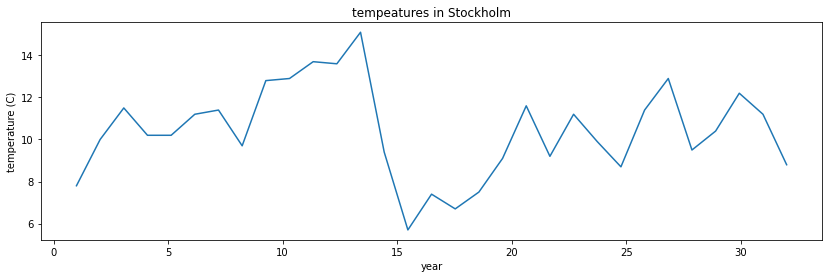

In [98]:
fig, ax = plt.subplots(figsize=(14,4))
x=linspace(1,32,31)
y=array([data[i,5] for i in range(data.shape[0]) if (data[i,0]==1950)*(data[i,1]==5)])
ax.plot(x,y)
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');


Используя `numpy.savetxt` можно записать Numpy массив в файл CSV формате:

In [100]:
M = random.rand(3,3)

M

array([[0.01957785, 0.26105203, 0.59452319],
       [0.84042664, 0.36882056, 0.06497298],
       [0.88157179, 0.65403621, 0.7400268 ]])

In [101]:
savetxt("random-matrix.csv", M)

In [103]:
savetxt("random-matrix.csv", M, fmt='%.5f') # fmt определяет формат данных
rand_data = genfromtxt('random-matrix.csv')
rand_data

array([[0.01958, 0.26105, 0.59452],
       [0.84043, 0.36882, 0.06497],
       [0.88157, 0.65404, 0.74003]])

### Формат файлов Numpy

Полезно при хранении и считывании данных массива numpy. Используйте функции `numpy.save` и `numpy.load`:

In [104]:
save("random-matrix.npy", M)

In [105]:
load("random-matrix.npy")

array([[0.01957785, 0.26105203, 0.59452319],
       [0.84042664, 0.36882056, 0.06497298],
       [0.88157179, 0.65403621, 0.7400268 ]])

### Задание 3
Из данных по температуре в Стокгольме выбрать данные относящиеся к октябрю 1970 года и записать их в бинарный и текстовый файлы oct70.bin и oct70.txt. Затем прочитайте их импортировав в тетрадь ноутбука и сравните.

## Дополнительные свойства `numpy` *arrays*

In [106]:
M.itemsize # размер элемента в байтах

8

In [107]:
M.nbytes # кол-во байт

72

In [108]:
M.ndim # размерность

2

## Преобразование массивов

### Использование индексов

Доступ к элементам через индекс:

In [109]:
# v -- вектор, размерность 1, испльзуем 1 индекс
v[0]

1

In [110]:
# M -- матрица, 2-х мерный объект, используем 2 индекса 
M[1,1]

0.36882056243262484

Если мы опустим один из индексов, то получим объект пониженной размерности. В случае двумерной матрицы, получим вектор. 

In [111]:
M

array([[0.01957785, 0.26105203, 0.59452319],
       [0.84042664, 0.36882056, 0.06497298],
       [0.88157179, 0.65403621, 0.7400268 ]])

In [112]:
M[1]

array([0.84042664, 0.36882056, 0.06497298])

Такой же эффект получится при использовании `:` на месте индекса:

In [113]:
M[1,:] # строка (row) 1

array([0.84042664, 0.36882056, 0.06497298])

In [114]:
M[:,1] # столбец (column) 1

array([0.26105203, 0.36882056, 0.65403621])

Мы можем присваивать новые значения элементам массива с помощью индексации:

In [115]:
M[0,0] = 1

In [116]:
M

array([[1.        , 0.26105203, 0.59452319],
       [0.84042664, 0.36882056, 0.06497298],
       [0.88157179, 0.65403621, 0.7400268 ]])

In [117]:
# также работает для строк и столбцов
M[1,:] = 0
M[:,2] = -1

In [118]:
M

array([[ 1.        ,  0.26105203, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.88157179,  0.65403621, -1.        ]])

### Срезы (*slice*) по индексам

Срезы по индексам техническое название `M[нижний индекс:верхний индекс:шаг]` предназначенные для извлечения части массива:

In [119]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [120]:
A[1:3]

array([2, 3])

Срезы массива являются *изменяемыми (mutable)*: если им присвоено новое значение, то исходный массив, из которого был извлечен срез, изменяется:

In [121]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

Можно не указывать любой из трех параметров среза`M[нижний индекс:верхний индекс:шаг]`:

In [122]:
A[::] # нижний, верхний индексы и шаг (=1) принимают значения по умолчанию

array([ 1, -2, -3,  4,  5])

In [123]:
A[::2] # шаг равен 2, нижний и верхний индексы принимают значения начала и конца массива

array([ 1, -3,  5])

In [124]:
A[:3] # первые три элемента

array([ 1, -2, -3])

In [125]:
A[3:] # элементы с индекса 3

array([4, 5])

Отрицательные индексы отсчитываются с конца массива (положительные - с начала):

In [126]:
A = array([1,2,3,4,5])

In [127]:
A[-1] # последний элемент массива

5

In [128]:
A[-3:] # последние 3 элемента

array([3, 4, 5])

Индексный срез работает точно так же для многомерных массивов:

In [3]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [130]:
# часть массива
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [131]:
# пошаговое извлечение
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Задание 4
Используя срезы извлеките нечетные элементы матрицы А. 

### Необычное индексирование

О необычном индексировании говорят, когда массив или список используется в качестве индекса: 

In [132]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [4]:
col_indices = [1, 2, -1] # вспомним, что -1 это последний элемент
A[:,col_indices]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

Можно также использовать индексные маски: Если индексная маска представляет собой массив Numpy типа данных `bool`, то элемент выбирается (True) или нет (False) в зависимости от значения индексной маски в позиции каждого элемента:

In [134]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [135]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [136]:
# тот же результат
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Эта функция очень полезна для условного выбора элементов из массива, используя, например, операторы сравнения:

In [137]:
x = arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [138]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [139]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

### Задание 5
Используйте массив из задания 1 (таблицу умножения) извлеките из него при помощи маски все числа кратные 3. 

## Функции для извлечения данных из массивов и создания массивов

### Функция where

Индексную маску можно превратить в список индексов, используя `where`:

In [140]:
indices = where(mask)

indices

(array([11, 12, 13, 14], dtype=int64),)

In [141]:
x[indices] # действие этого списка эквивалентно маске, т.е. x[mask]

array([5.5, 6. , 6.5, 7. ])

### Функция diag

При помощи функции diag можно извлекать диагональные элементы с главной и смещенных диагоналей:

In [142]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [143]:
diag(A, -1)

array([10, 21, 32, 43])

### Функция take

Функция `take` подобна описанной выше необычной индексации:

In [144]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [145]:
row_indices = [1, 3, 5]
v2[row_indices] # необычная индексация

array([-2,  0,  2])

In [146]:
v2.take(row_indices)

array([-2,  0,  2])

Но функция `take` так же работает на списках и других объектах:

In [147]:
take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### Функция choose

Создает массив собирая элементы из нескольких массивов:

In [148]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

choose(which, choices)

array([ 5, -2,  5, -2])

### Задание 7
Разбить массив таблицы умножения из задания 1 на два массива содержащие четные и нечетные значения, а затем собрать его в исходное состояние используя choose()

In [167]:
#z
#print(z)
z1 = array(z)

mask_even = mod(z1, 2) == 0
mask_odd = mod(z1, 2) == 1

z2 = z1 * mask_even
z3 = z1 * mask_odd

#print(z2, z3)
print(mask_odd)
print(choose(mask_odd, [z2, z3]))



[[ True False  True False  True False  True False  True False]
 [False False False False False False False False False False]
 [ True False  True False  True False  True False  True False]
 [False False False False False False False False False False]
 [ True False  True False  True False  True False  True False]
 [False False False False False False False False False False]
 [ True False  True False  True False  True False  True False]
 [False False False False False False False False False False]
 [ True False  True False  True False  True False  True False]
 [False False False False False False False False False False]]
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54

## Линейная алгебра

Векторизация кода-это ключ к написанию эффективных численных вычислений с помощью Python / Numpy. Это означает, что максимально возможная часть программы должна быть сформулирована в терминах матричных и векторных операций, таких как матричного умножения.

### Операции между числами и векторами

Мы можем использовать обычные арифметические операторы для умножения, сложения, вычитания и деления массивов со скалярами или обычными числами.

In [149]:
v1 = arange(0, 5)

In [150]:
v1 * 2

array([0, 2, 4, 6, 8])

In [151]:
v1 + 2

array([2, 3, 4, 5, 6])

In [152]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]),
 array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Поэлементные операции между массивами

Когда мы складываем, вычитаем, умножаем и делим массивы друг с другом, поведение по умолчанию-это операции **по элементам**, т.е. между элементами с совпадающими индексами:

In [153]:
A * A # поэлементное умножение

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [154]:
v1 * v1

array([ 0,  1,  4,  9, 16])

Если мы умножим массивы с совместимыми размерами, то получим элементарное умножение каждой строки:

In [155]:
A.shape, v1.shape

((5, 5), (5,))

In [156]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Алгебра матриц

А как насчет умножения матриц? Есть два пути. Мы можем либо использовать функцию `dot`, которая применяет умножение матрица-матрица, матрица-вектор или скалярное векторное к своим двум аргументам:

In [157]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [158]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [159]:
dot(v1, v1)

30

В качестве альтернативы мы можем привести объекты типа массива к типу `matrix`. Это изменяет поведение стандартных арифметических операторов `+, -, *` для использования алгебры матриц.

In [160]:
M = matrix(A)
v = matrix(v1).T # транспонирует массив в вектор столбец

In [161]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [162]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [163]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [164]:
# скалярное произведение
v.T * v

matrix([[30]])

In [165]:
# с объектами типа matrix работают все операции
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

Если использовать операции `+, -, *` с несовместимыми объектами будет выброс исключения или ошибки

In [166]:
v = matrix([1,2,3,4,5]).T

In [167]:
shape(M), shape(v)

((5, 5), (5, 1))

In [168]:
M * v

matrix([[ 40],
        [190],
        [340],
        [490],
        [640]])

Посмотрите также другие подобные функции: `inner`, `outer`, `cross`, `kron`, `tensordot`. Попробуйте набрать `help(kron)`.

### Преобразования массив/матрица

Выше мы уже использовали `.T` для транспонирования матричного объекта `v`. Мы также могли бы использовать функцию `transpose` для выполнения того же самого.

Другими математическими функциями, преобразующими матричные объекты, являются:

In [169]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [170]:
conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово сопряжение: `transpose + conjugate`

In [171]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

Можно извлекать действительную и мнимую часть комплексного объекта, используя `real` и `imag`:

In [172]:
real(C) # то же, что и: C.real

matrix([[0., 0.],
        [0., 0.]])

In [173]:
imag(C) # то же, что и: C.imag

matrix([[1., 2.],
        [3., 4.]])

Или комплексный аргумент(угол) и модуль

In [174]:
angle(C+1) # для пользователей MATLAB, angle используется вместо arg

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [175]:
abs(C)

matrix([[1., 2.],
        [3., 4.]])

### Задание 8
Даны вектора v1(0,1,2,3,4) v2(5,6,7,8,9) найти угол между ними, учитывая что косинус угла между векторами можно найти как отношения их скалярного произведения к их длинам.

### Вычисления над матрицами

#### Функция Inv - инверсия

In [176]:
linalg.inv(C) # эквивалентно C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [177]:
C.I * C

matrix([[1.0000000e+00+0.j, 8.8817842e-16+0.j],
        [0.0000000e+00+0.j, 1.0000000e+00+0.j]])

#### Функция det - детерминант

In [178]:
linalg.det(C)

(2.0000000000000004+0j)

In [179]:
linalg.det(C.I)

(0.5+0j)

### Задача 9
Создайте две матрицы размером (5,5). Одна матрица содержит 5 в шахматном порядке как в задаче домашнего задания, другая имеет треугольную форму содержающую 5 на основной диагонали и в позициях выше ее, а ниже все 0. Посчитайте их детерминант и найдите обратные матрицы. Если для матрицы не у дается найти обратную, видимо этому мешает нулевое значение детерминанта.

In [151]:
M1 = zeros((5,5))

M2 = zeros((5,5))

#print(M1, M2, sep='\n')

M1[::2, ::2] = 5
M1[1::2, 1::2] = 5

print("Матрица: 1\n", M1)


M2 = array([[0. if i <j else 5. for i in range(5)] for j in range(5)])

print("Матрица: 2\n", M2)


print("Детерминант матрицы 1: ", linalg.det(M1))
print("Детерминант матрицы 1: ", linalg.det(M2))

print("Обратная матрица", 1/linalg.det(M1)*M1.T)
print(1/linalg.det(M2)*M2.T)


Матрица: 1
 [[5. 0. 5. 0. 5.]
 [0. 5. 0. 5. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 0. 5. 0.]
 [5. 0. 5. 0. 5.]]
Матрица: 2
 [[5. 5. 5. 5. 5.]
 [0. 5. 5. 5. 5.]
 [0. 0. 5. 5. 5.]
 [0. 0. 0. 5. 5.]
 [0. 0. 0. 0. 5.]]
Детерминант матрицы 1:  0.0
Детерминант матрицы 1:  3124.999999999999
Обратная матрица [[inf nan inf nan inf]
 [nan inf nan inf nan]
 [inf nan inf nan inf]
 [nan inf nan inf nan]
 [inf nan inf nan inf]]
[[0.0016 0.     0.     0.     0.    ]
 [0.0016 0.0016 0.     0.     0.    ]
 [0.0016 0.0016 0.0016 0.     0.    ]
 [0.0016 0.0016 0.0016 0.0016 0.    ]
 [0.0016 0.0016 0.0016 0.0016 0.0016]]


/tmp/ipykernel_14398/2379759500.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  print("Обратная матрица", 1/linalg.det(M1)*M1.T)
/tmp/ipykernel_14398/2379759500.py:21: RuntimeWarning: invalid value encountered in multiply
  print("Обратная матрица", 1/linalg.det(M1)*M1.T)


### Обработка данных

Часто бывает полезно хранить наборы данных в массивах Numpy. Numpy предоставляет ряд функций для вычисления статистики наборов данных в массивах.

Например, давайте рассчитаем некоторые свойства из набора данных температуры Стокгольма, использованного выше.

In [180]:
# напоминаем в переменной data храняться данные температуры в Стокгольме
data.shape

(77431, 7)

#### Функция mean

In [181]:
# the temperature data is in column 3
mean(data[:,3])

6.197109684751585

Средняя дневная температура в Стокгольме за последние 200 лет 6.2 C.

#### Функции стандартного отклонения и дисперсии

In [182]:
std(data[:,3]), var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### Функции min и max

In [183]:
# минимальная температура
data[:,3].min()

-25.8

In [184]:
# максимальная температура
data[:,3].max()

28.3

#### Функции sum, prod и trace

In [185]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [186]:
# сумма всех элементов
sum(d)

45

In [187]:
# произведение всех элементов
prod(d+1)

3628800

In [188]:
# совокупная сумма
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [189]:
# совокупное произведение
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800], dtype=int32)

In [190]:
# тоже что и: diag(A).sum()
trace(A)

110

### Вычисления на подмножествах массива

Можно выполнять вычисления на подмножествах используя индексирование, необычное индексирование и другие методы извлечения данных из массива.

Рассмотрим данные массива температур в Стокгольме:

Формат данных: год, месяц, день, дневная средняя температура, самая низкая, самая высокая, местность.

Если необходимо извлечь среднюю температуру в какой-то конкретный месяц, например февраль, тогда нужно создать маску индексов и использовать ее для извлечения данных только за этот месяц:

In [191]:
unique(data[:,1]) # столбик месяцев от 1 до 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [192]:
mask_feb = data[:,1] == 2

In [193]:
# температурные данные в столбике 3
mean(data[mask_feb,3])

-3.212109570736596

С этими интструментами открываются широкие возможности для обработки данных. Например, чтобы извлечь среднюю температуру за месяц по всем месяцам достаточно несколько строк кода:

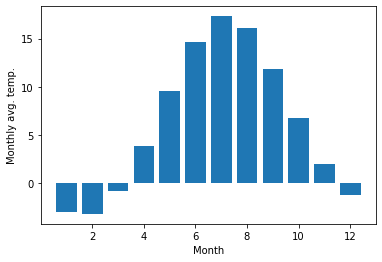

In [194]:
months = arange(1,13)
monthly_mean = [mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Вычисления с данными высокой размерности

Когда функции, такие как `min`, `max` и т. д. применяются к многомерным массивам, иногда полезно применять расчет ко всему массиву, а иногда только на основе строки или столбца. Используя аргумент `axis`, мы можем указать, как должны вести себя эти функции:

In [195]:
m = random.rand(3,3)
m

array([[0.86270493, 0.96981009, 0.96959743],
       [0.35425871, 0.52085563, 0.48726959],
       [0.61650805, 0.05690313, 0.1292265 ]])

In [196]:
# максимум по массиву
m.max()

0.9698100908575067

In [197]:
# максимумы по каждому столбцу
m.max(axis=0)

array([0.86270493, 0.96981009, 0.96959743])

In [198]:
# максимумы по каждой строке
m.max(axis=1)

array([0.96981009, 0.52085563, 0.61650805])

Многие другие функции и методы в классах `array` и `matrix` принимают один и тот же (необязательный) аргумент ключевого слова `axis`.

## Преобразования формы, размера и соединение массивов

Форма массива Numpy может быть изменена без копирования базовых данных, что делает его быстрой операцией даже для больших массивов.

In [199]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [200]:
n, m = A.shape

In [201]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [202]:
B[0,0:5] = 5 # изменим массив

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [203]:
A # и оригинальные данные тоже изменятся. A и B это ссылки на одни и теже данные

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Мы также можем использовать функцию `flatten`, чтобы превратить массив более высоких измерений в вектор. Но эта функция создает копию данных.

In [204]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [205]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [206]:
A # теперь A неизменилась, поскольку данные B это копия A, теперь B не ссылается на те же данные.

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Дополнение новых размерностей: newaxis

С `newaxis`, можно добавить новые размерности в массив. Например, превратить вектор в матрицу:

In [207]:
v = array([1,2,3])

In [208]:
shape(v)

(3,)

In [209]:
# создание столбца матрицы из вектора v
v[:, newaxis]

array([[1],
       [2],
       [3]])

In [210]:
# столбец матрицы
v[:,newaxis].shape

(3, 1)

In [211]:
# строка матрицы
v[newaxis,:].shape

(1, 3)

## Соединение и повторение массивов

Используя функции `repeat`, `tile`, `vstack`, `hstack` и `concatenate` мы можем создать больше векторов и матриц из более мелких:

### `tile` и `repeat`

In [212]:
a = array([[1, 2], [3, 4]])

In [213]:
# повторить каждый элемент 3 раза
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [214]:
# повторить матрицу 3 раза 
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### `concatenate`

In [215]:
b = array([[5, 6]])

In [216]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [217]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### `hstack` и `vstack`

In [218]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [219]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Копия и "глубокая копия"

Для достижения высокой производительности назначения в Python обычно не копируют базовые объекты. Это важно, например, когда объекты передаются между функциями, чтобы избежать чрезмерного объема копирования памяти, когда это не является необходимым (технический термин: пропуск по ссылке).

In [220]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [221]:
# теперь В ссылается натеже данные, что и А 
B = A 

In [222]:
# изменения B отражаются в A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [223]:
A

array([[10,  2],
       [ 3,  4]])

Если мы хотим избежать такого поведения, чтобы при получении нового полностью независимого объекта `B`, скопированного из `A`, нам нужно было сделать так называемое "глубокое копирование" с помощью функции `copy`:

In [224]:
B = copy(A)

In [225]:
# теперь при изменении В, А не меняется

B

array([[10,  2],
       [ 3,  4]])

In [226]:
A

array([[10,  2],
       [ 3,  4]])

## Иттерация на элементах массива

Как правило, мы хотим избежать повторения элементов массивов всякий раз, когда это возможно (любой ценой). Причина в том, что в интерпретируемом языке, таком как Python (или MATLAB), итерации действительно медленны по сравнению с векторизованными операциями.

Однако, иногда итерации неизбежны. Для таких случаев цикл Python `for` является наиболее удобным способом перебора массива:

In [227]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [228]:
M = array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


Когда нам нужно перебирать каждый элемент массива и изменять его элементы, удобно использовать функцию `enumerate` для получения как элемента, так и его индекса в цикле `for` :

In [229]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # обновляет матрицу M: возводя ее элементы в квадрат
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [230]:
# каждый элемент в M возведен в квадрат
M

array([[ 1,  4],
       [ 9, 16]])

## Векторные функции

Как уже упоминалось несколько раз, чтобы получить хорошую производительность, мы должны стараться избегать циклического перебора элементов в наших векторах и матрицах, а вместо этого использовать векторизованные алгоритмы. Первый шаг в преобразовании скалярного алгоритма в векторизованный алгоритм заключается в том, чтобы убедиться, что функции, которые мы пишем, работают с векторными входными данными.

In [231]:
def Theta(x):
    """
    Скалярная реализация функции порога Хевисайда.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [232]:
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Хорошо, это не сработало, потому что мы не написали функцию `Theta`, чтобы она могла обрабатывать векторный ввод...

Чтобы получить векторизованную версию теты, мы можем использовать функцию Numpy `vectorize`. Во многих случаях он может автоматически векторизовать функцию:

In [233]:
Theta_vec = vectorize(Theta)

In [234]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Мы также можем реализовать функцию для приема векторного ввода с самого начала (требует больше усилий, но может дать лучшую производительность):

In [235]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [236]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [237]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Использование массива в условии

При использовании массивов в условиях, например, `if` операторы и другие логические выражения, нужно использовать `any` или `all`, что требует, чтобы любой или все элементы в массиве равнялись `True`:

In [238]:
M

array([[ 1,  4],
       [ 9, 16]])

In [239]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [240]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Подбор типа

Поскольку массивы Numpy статически типизированы, тип массива не изменяется после его создания. Но мы можем явно привести массив некоторого типа к другому, используя функции `astype` (см. также аналогичную функцию `asarray`). Это всегда создает новый массив нового типа:

In [241]:
M.dtype

dtype('int32')

In [242]:
M2 = M.astype(float)

M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [243]:
M2.dtype

dtype('float64')

In [244]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

## Дальнейшее изучение

* http://numpy.scipy.org
* [Tentative NumPy Tutorial](http://scipy.org/Tentative_NumPy_Tutorial)
* [A Numpy guide for MATLAB users](http://scipy.org/NumPy_for_Matlab_Users).
* Этот [материал](http://github.com/jrjohansson/scientific-python-lectures) создан на основе книг [J.R. Johansson](http://jrjohansson.github.io).